# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import pandas as pd

if '../../../../notebooks/' not in sys.path:
    sys.path.append('../../../../notebooks/')
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import utils.constants as cts

from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from exp_runner import ExperimentRunner
from model_trainer import BaseModel, Optimizer
from model_evaluator import DataSource, DataPredSelection

# Start Network runner

In [3]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Fine tuning last 2 blocks (block5_conv3 and block5_pool) of VGG16 for 10 epochs and training for 200 epochs',
        'tags': ['vgg16', 'ground truths', 'adamax', 'mtl', 'fine-tuning', '200 epochs'],
        'src_files': ["src/**/*.py"]
    },
    'properties': {
        'reqs': list(cts.ICAO_REQ),
        'aligned': False,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC]
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 2,
        'early_stopping': 10,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 42803
Process ID: 47355
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'exp_params': {'description': 'Fine tuning last 2 blocks (block5_conv3 and '
                               'block5_pool) of VGG16 for 10 epochs and '
                               'training for 200 epochs',
                'name': 'train_vgg16',
                'src_files': ['src/**/*.py'],
                'tags': ['vgg16',
                         'ground truths',
                         'adamax',
                         'mtl',
                         'fine-tuning',
                         '200 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f69c1ddfee0>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
               

# Load Data

In [4]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


# Sampling Training Data

In [5]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [6]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [7]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [8]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

# Create Model

In [9]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

-------------------- vizualize model -------------------


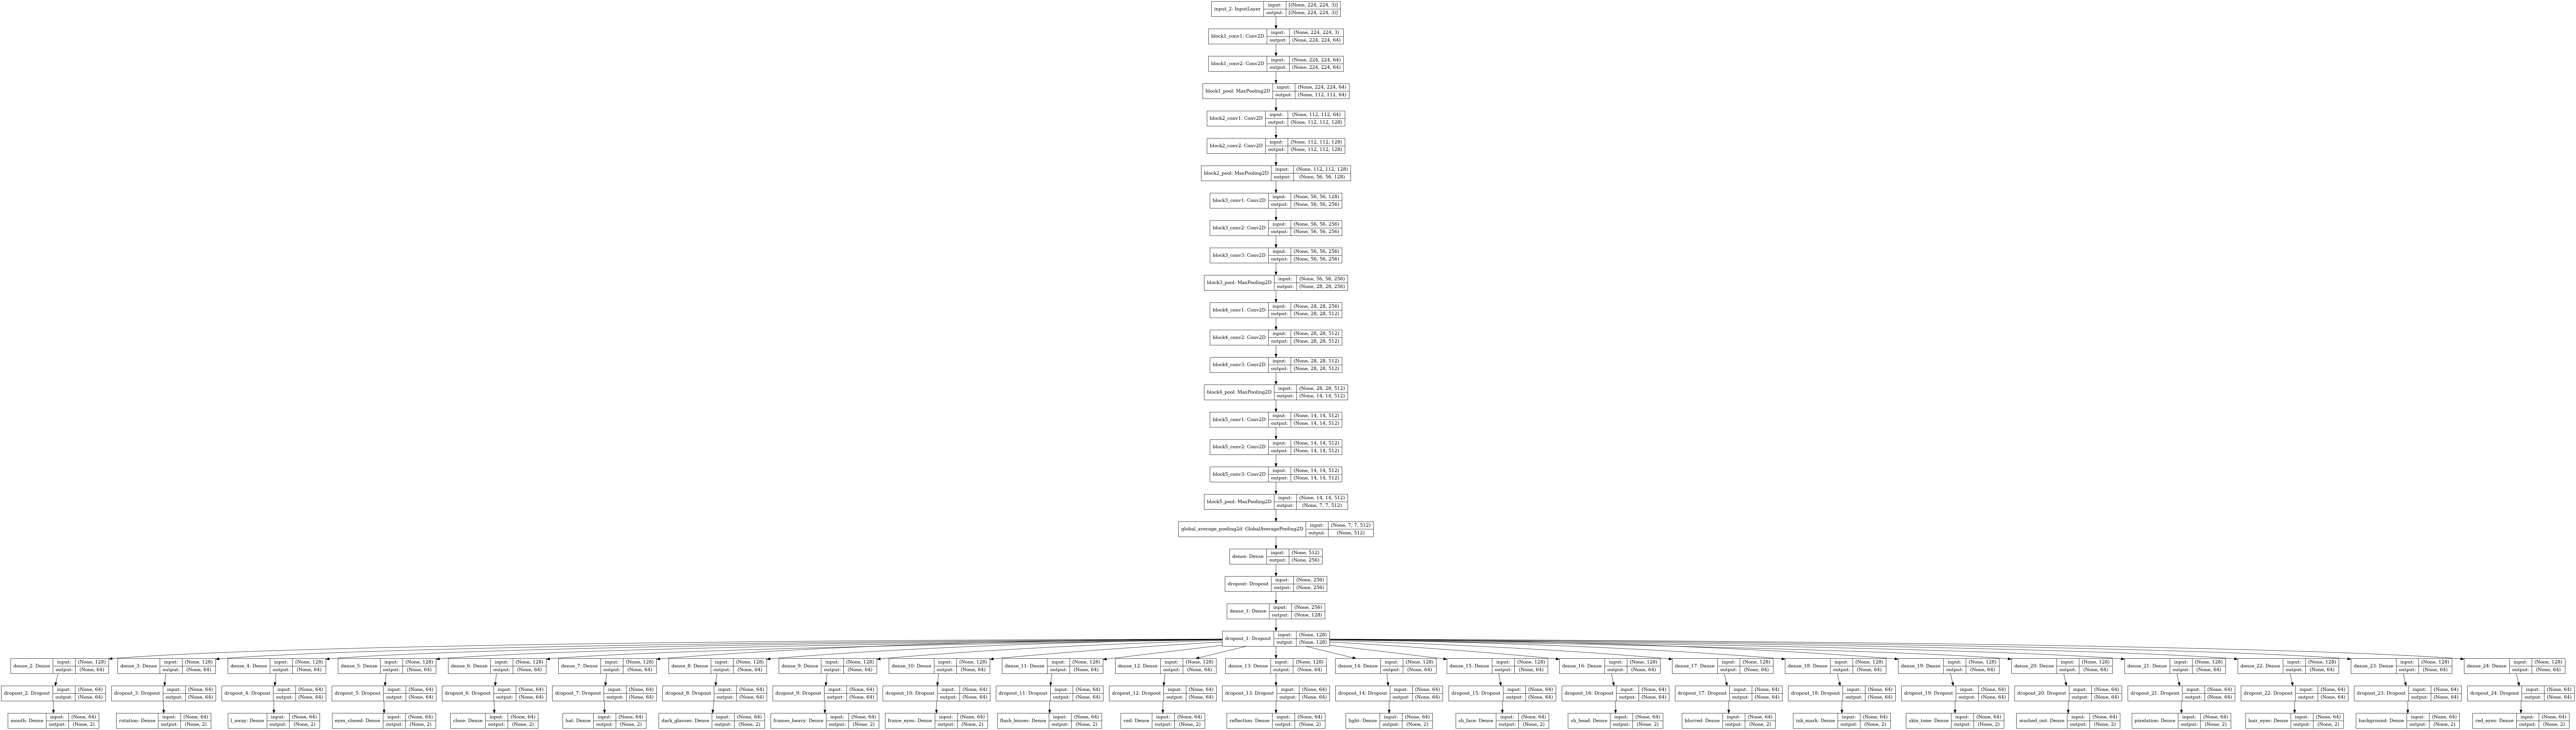

In [10]:
runner.vizualize_model(outfile_path=f"figs/handcrafted_mtl_model.png")

In [11]:
runner.model_summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

# Training Model - Fine-Tuning

In [14]:
runner.train_model(fine_tuned=True, n_epochs=3)

-------------------- train model -------------------
Training VGG16 network
 .. Fine tuning base model...
 .. Base model non trainable layers: ['input_2', 'block1_conv1', 'block1_conv2', 'block1_pool', 'block2_conv1', 'block2_conv2', 'block2_pool', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block3_pool', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block4_pool', 'block5_conv1', 'block5_conv2']
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
___________________________________________________________________________________

# Plots - Fine-Tuned

-------------------- draw training history -------------------


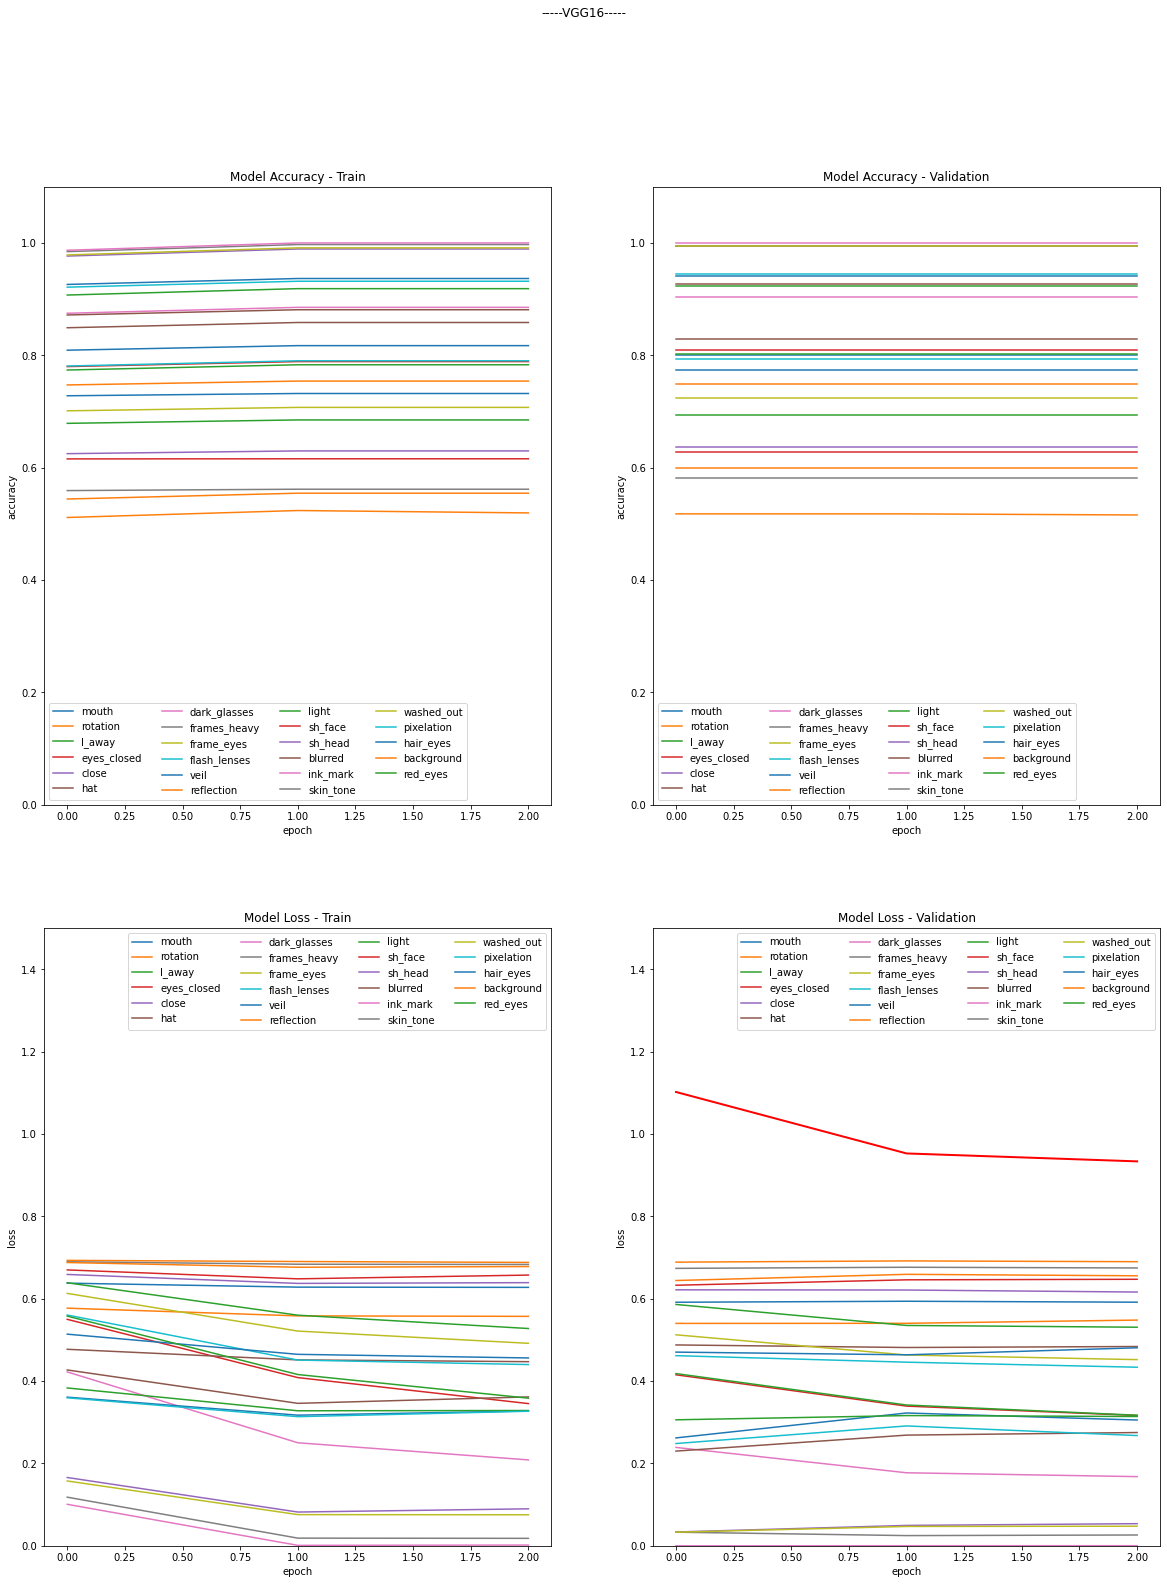

In [15]:
runner.draw_training_history()

# Load Best Model - Fine-Tuned

In [16]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model - Fine-Tuned

In [17]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished


# Train Again Without Fine Tuning

In [ ]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]

# Plots - New Train

In [13]:
runner.draw_training_history()

-------------------- draw training history -------------------
Not training a model. Downloading plot from Neptune
 ..Experiment ID: ICAO-189
 ..Downloading plot from previous experiment
https://ui.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-189
 ..Download finished
 ..Uploading plot
 ..Upload finished


# Load Best Model - New Train

In [14]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Model loaded
...Model path: prev_trained_models/multi_task/fvc_not_aligned/multi_reqs/ICAO-189


# Saving Trained Model - New Train

In [15]:
runner.save_model()

-------------------- save model -------------------
Saving model
INFO:tensorflow:Assets written to: prev_trained_models/multi_task/fvc_not_aligned/multi_reqs/ICAO-189/assets
..Model saved
...Model path: prev_trained_models/multi_task/fvc_not_aligned/multi_reqs/ICAO-189
Saving model to neptune
 ..Uploading file trained_model.zip
Model saved into Neptune
Saving process finished


# Test Trained Model

## Validation Split

Testing Trained Model
Predicting labels....
9/9 [==============================] - 45s 4s/step
Prediction finished!
Requisite: MOUTH


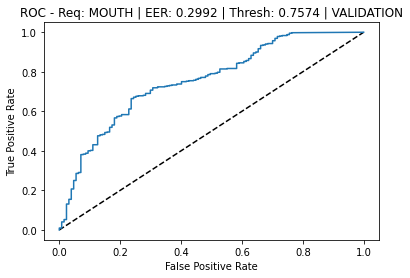

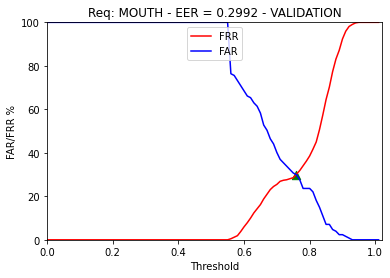

Requisite: MOUTH - EER_interp: 29.92% - Best Threshold: 0.7574223875999144
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.42      0.70      0.53       127
    COMPLIANT       0.89      0.71      0.79       420

     accuracy                           0.71       547
    macro avg       0.65      0.70      0.66       547
 weighted avg       0.78      0.71      0.73       547

Confusion matrix ----------------------------------------
FAR: 29.92% | FRR: 29.29% | EER_mean: 29.609999999999996% | TP: 297 | TN: 89 | FP: 38 | FN: 123
Accuracy ------------------------------------------------
Model Accuracy: 70.57%
---------------------------------------------------------
Requisite: ROTATION


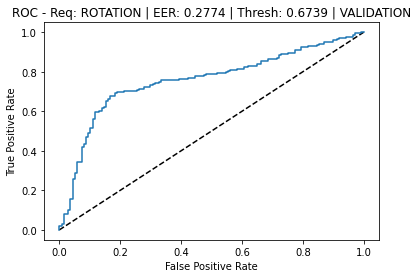

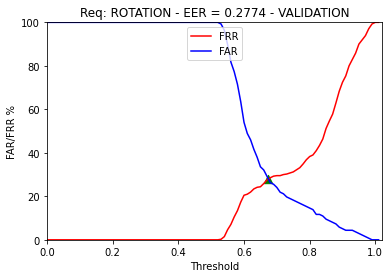

Requisite: ROTATION - EER_interp: 27.74% - Best Threshold: 0.6739002466198372
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.47      0.72      0.57       137
    COMPLIANT       0.89      0.72      0.80       410

     accuracy                           0.72       547
    macro avg       0.68      0.72      0.68       547
 weighted avg       0.78      0.72      0.74       547

Confusion matrix ----------------------------------------
FAR: 27.74% | FRR: 27.560000000000002% | EER_mean: 27.650000000000002% | TP: 297 | TN: 99 | FP: 38 | FN: 113
Accuracy ------------------------------------------------
Model Accuracy: 72.39%
---------------------------------------------------------
Requisite: L_AWAY


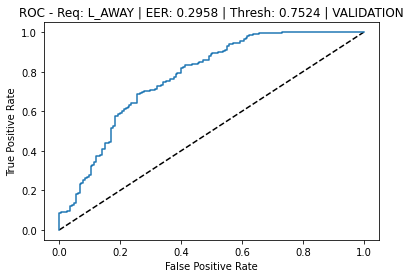

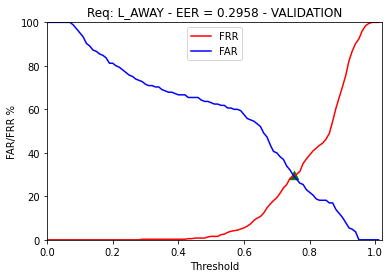

Requisite: L_AWAY - EER_interp: 29.580000000000002% - Best Threshold: 0.7523777419359896
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.51      0.71      0.59       165
    COMPLIANT       0.85      0.70      0.77       382

     accuracy                           0.71       547
    macro avg       0.68      0.71      0.68       547
 weighted avg       0.75      0.71      0.72       547

Confusion matrix ----------------------------------------
FAR: 29.09% | FRR: 29.580000000000002% | EER_mean: 29.34% | TP: 269 | TN: 117 | FP: 48 | FN: 113
Accuracy ------------------------------------------------
Model Accuracy: 70.57%
---------------------------------------------------------
Requisite: EYES_CLOSED


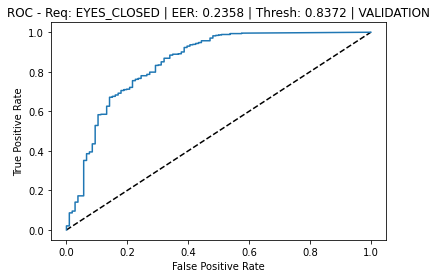

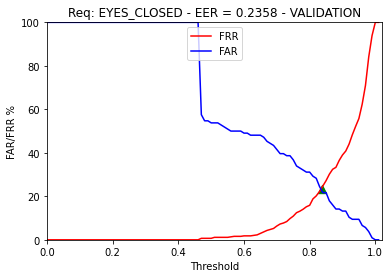

Requisite: EYES_CLOSED - EER_interp: 23.580000000000002% - Best Threshold: 0.837242245674147
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.76      0.55       106
    COMPLIANT       0.93      0.76      0.84       441

     accuracy                           0.76       547
    macro avg       0.68      0.76      0.70       547
 weighted avg       0.83      0.76      0.78       547

Confusion matrix ----------------------------------------
FAR: 23.580000000000002% | FRR: 23.810000000000002% | EER_mean: 23.7% | TP: 336 | TN: 81 | FP: 25 | FN: 105
Accuracy ------------------------------------------------
Model Accuracy: 76.23%
---------------------------------------------------------
Requisite: CLOSE


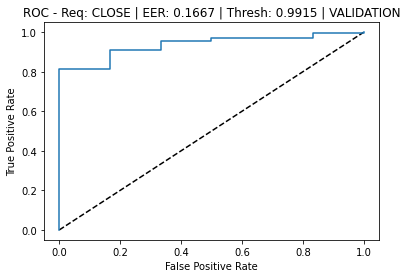

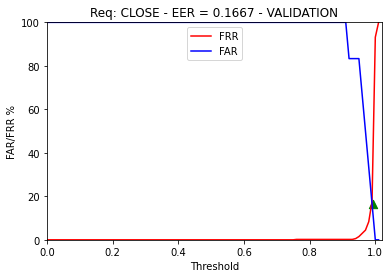

Requisite: CLOSE - EER_interp: 16.669999999999998% - Best Threshold: 0.9915024042129519
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      0.83      0.09         6
    COMPLIANT       1.00      0.81      0.90       541

     accuracy                           0.81       547
    macro avg       0.52      0.82      0.49       547
 weighted avg       0.99      0.81      0.89       547

Confusion matrix ----------------------------------------
FAR: 16.669999999999998% | FRR: 18.67% | EER_mean: 17.669999999999998% | TP: 440 | TN: 5 | FP: 1 | FN: 101
Accuracy ------------------------------------------------
Model Accuracy: 81.35%
---------------------------------------------------------
Requisite: HAT


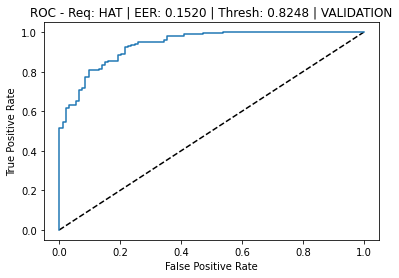

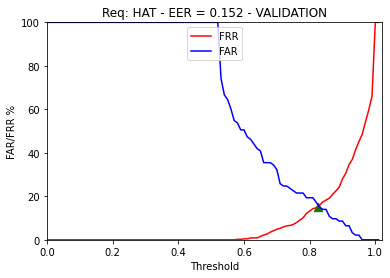

Requisite: HAT - EER_interp: 15.2% - Best Threshold: 0.8247990174965711
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.53      0.85      0.66        93
    COMPLIANT       0.96      0.85      0.90       454

     accuracy                           0.85       547
    macro avg       0.75      0.85      0.78       547
 weighted avg       0.89      0.85      0.86       547

Confusion matrix ----------------------------------------
FAR: 15.049999999999999% | FRR: 15.2% | EER_mean: 15.120000000000001% | TP: 385 | TN: 79 | FP: 14 | FN: 69
Accuracy ------------------------------------------------
Model Accuracy: 84.83000000000001%
---------------------------------------------------------
Requisite: DARK_GLASSES


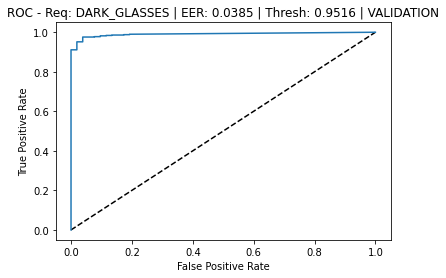

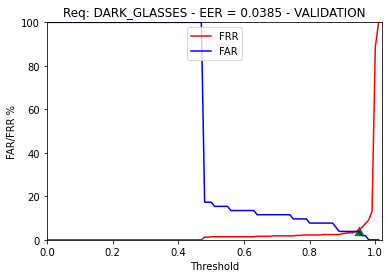

Requisite: DARK_GLASSES - EER_interp: 3.85% - Best Threshold: 0.9516390562058563
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.68      0.96      0.79        52
    COMPLIANT       1.00      0.95      0.97       495

     accuracy                           0.95       547
    macro avg       0.84      0.96      0.88       547
 weighted avg       0.97      0.95      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.85% | FRR: 4.8500000000000005% | EER_mean: 4.35% | TP: 471 | TN: 50 | FP: 2 | FN: 24
Accuracy ------------------------------------------------
Model Accuracy: 95.25%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


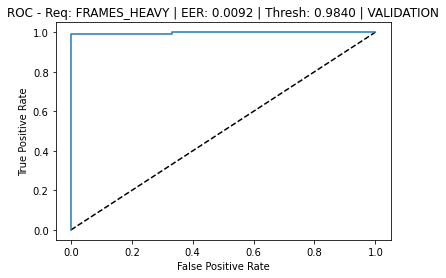

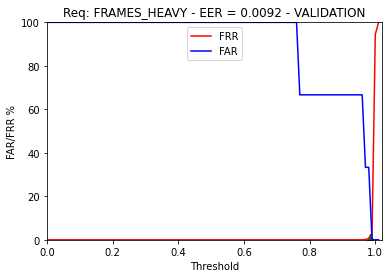

Requisite: FRAMES_HEAVY - EER_interp: 0.9199999999999999% - Best Threshold: 0.9839987645254415
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      1.00      0.55         3
    COMPLIANT       1.00      0.99      1.00       544

     accuracy                           0.99       547
    macro avg       0.69      1.00      0.77       547
 weighted avg       1.00      0.99      0.99       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 0.9199999999999999% | EER_mean: 0.45999999999999996% | TP: 539 | TN: 3 | FP: 0 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 99.09%
---------------------------------------------------------
Requisite: FRAME_EYES


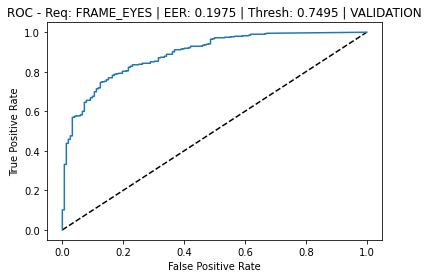

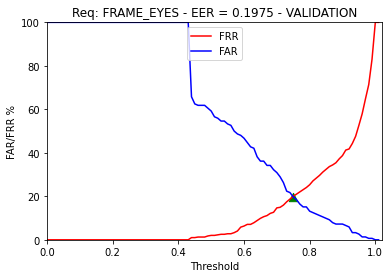

Requisite: FRAME_EYES - EER_interp: 19.75% - Best Threshold: 0.7495381402063941
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.61      0.80      0.69       152
    COMPLIANT       0.91      0.80      0.85       395

     accuracy                           0.80       547
    macro avg       0.76      0.80      0.77       547
 weighted avg       0.83      0.80      0.81       547

Confusion matrix ----------------------------------------
FAR: 19.74% | FRR: 19.75% | EER_mean: 19.75% | TP: 317 | TN: 122 | FP: 30 | FN: 78
Accuracy ------------------------------------------------
Model Accuracy: 80.25999999999999%
---------------------------------------------------------
Requisite: FLASH_LENSES


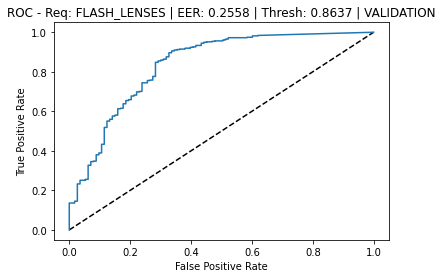

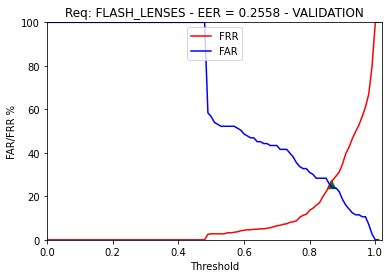

Requisite: FLASH_LENSES - EER_interp: 25.580000000000002% - Best Threshold: 0.863668301550474
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.75      0.55       113
    COMPLIANT       0.92      0.74      0.82       434

     accuracy                           0.75       547
    macro avg       0.68      0.75      0.69       547
 weighted avg       0.82      0.75      0.77       547

Confusion matrix ----------------------------------------
FAR: 24.779999999999998% | FRR: 25.580000000000002% | EER_mean: 25.180000000000003% | TP: 323 | TN: 85 | FP: 28 | FN: 111
Accuracy ------------------------------------------------
Model Accuracy: 74.59%
---------------------------------------------------------
Requisite: VEIL


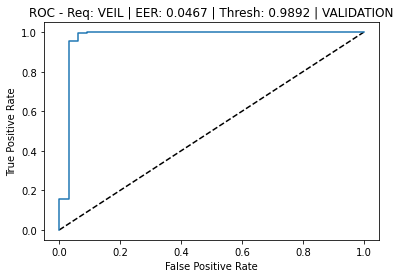

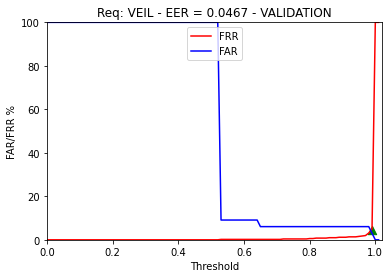

Requisite: VEIL - EER_interp: 4.67% - Best Threshold: 0.9891687891362706
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.57      0.97      0.72        33
    COMPLIANT       1.00      0.95      0.98       514

     accuracy                           0.95       547
    macro avg       0.78      0.96      0.85       547
 weighted avg       0.97      0.95      0.96       547

Confusion matrix ----------------------------------------
FAR: 3.0300000000000002% | FRR: 4.67% | EER_mean: 3.85% | TP: 490 | TN: 32 | FP: 1 | FN: 24
Accuracy ------------------------------------------------
Model Accuracy: 95.43%
---------------------------------------------------------
Requisite: REFLECTION


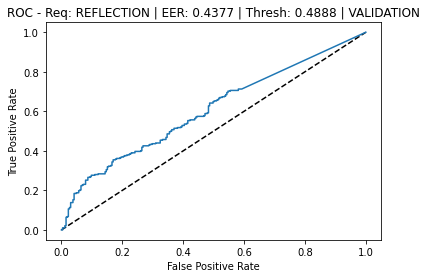

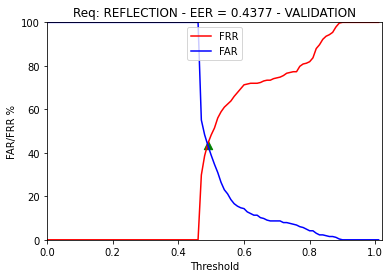

Requisite: REFLECTION - EER_interp: 43.769999999999996% - Best Threshold: 0.4888381361961365
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.55      0.56      0.55       265
    COMPLIANT       0.58      0.56      0.57       282

     accuracy                           0.56       547
    macro avg       0.56      0.56      0.56       547
 weighted avg       0.56      0.56      0.56       547

Confusion matrix ----------------------------------------
FAR: 43.769999999999996% | FRR: 43.62% | EER_mean: 43.69% | TP: 159 | TN: 149 | FP: 116 | FN: 123
Accuracy ------------------------------------------------
Model Accuracy: 56.31%
---------------------------------------------------------
Requisite: LIGHT


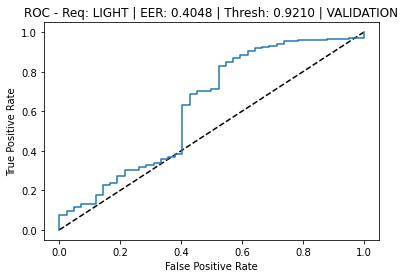

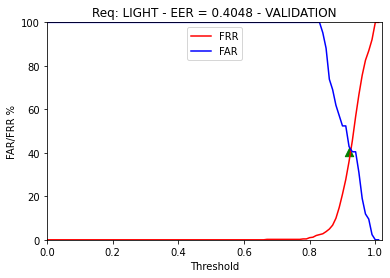

Requisite: LIGHT - EER_interp: 40.48% - Best Threshold: 0.9209891557693445
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.12      0.60      0.20        42
    COMPLIANT       0.95      0.63      0.76       505

     accuracy                           0.63       547
    macro avg       0.53      0.61      0.48       547
 weighted avg       0.89      0.63      0.71       547

Confusion matrix ----------------------------------------
FAR: 40.48% | FRR: 37.03% | EER_mean: 38.76% | TP: 318 | TN: 25 | FP: 17 | FN: 187
Accuracy ------------------------------------------------
Model Accuracy: 62.71%
---------------------------------------------------------
Requisite: SH_FACE


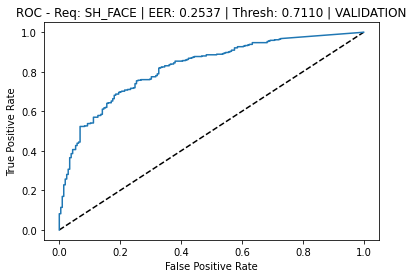

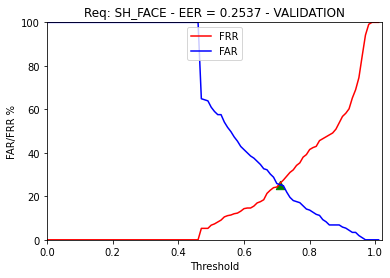

Requisite: SH_FACE - EER_interp: 25.369999999999997% - Best Threshold: 0.7110483050350354
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.63      0.75      0.68       205
    COMPLIANT       0.83      0.74      0.78       342

     accuracy                           0.74       547
    macro avg       0.73      0.74      0.73       547
 weighted avg       0.76      0.74      0.75       547

Confusion matrix ----------------------------------------
FAR: 25.369999999999997% | FRR: 26.02% | EER_mean: 25.7% | TP: 253 | TN: 153 | FP: 52 | FN: 89
Accuracy ------------------------------------------------
Model Accuracy: 74.22%
---------------------------------------------------------
Requisite: SH_HEAD


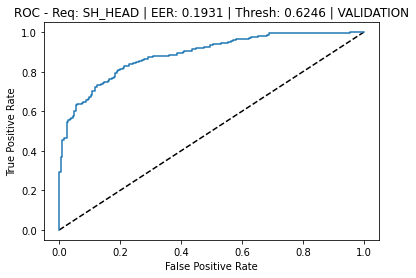

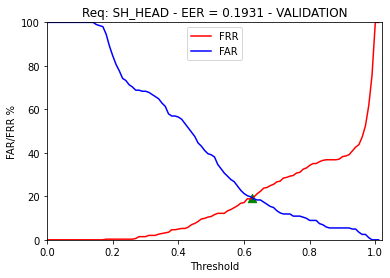

Requisite: SH_HEAD - EER_interp: 19.31% - Best Threshold: 0.6245671510693961
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.71      0.81      0.76       202
    COMPLIANT       0.88      0.81      0.84       345

     accuracy                           0.81       547
    macro avg       0.79      0.81      0.80       547
 weighted avg       0.82      0.81      0.81       547

Confusion matrix ----------------------------------------
FAR: 19.31% | FRR: 19.13% | EER_mean: 19.220000000000002% | TP: 279 | TN: 163 | FP: 39 | FN: 66
Accuracy ------------------------------------------------
Model Accuracy: 80.80000000000001%
---------------------------------------------------------
Requisite: BLURRED


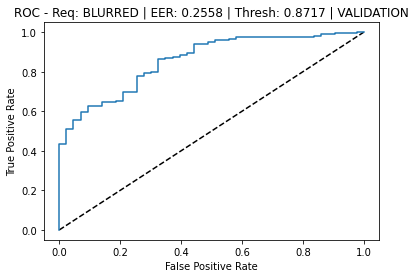

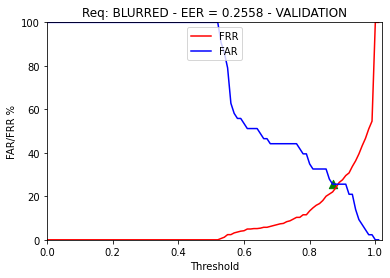

Requisite: BLURRED - EER_interp: 25.580000000000002% - Best Threshold: 0.8717123270033567
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.22      0.74      0.34        43
    COMPLIANT       0.97      0.78      0.87       504

     accuracy                           0.78       547
    macro avg       0.60      0.76      0.60       547
 weighted avg       0.91      0.78      0.82       547

Confusion matrix ----------------------------------------
FAR: 25.580000000000002% | FRR: 22.02% | EER_mean: 23.799999999999997% | TP: 393 | TN: 32 | FP: 11 | FN: 111
Accuracy ------------------------------------------------
Model Accuracy: 77.7%
---------------------------------------------------------
Requisite: SKIN_TONE


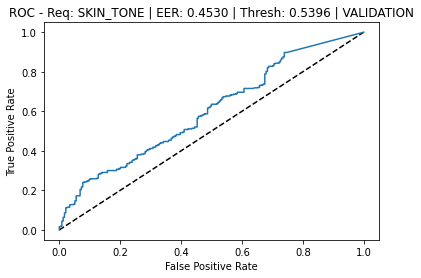

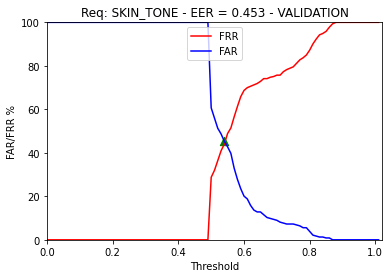

Requisite: SKIN_TONE - EER_interp: 45.300000000000004% - Best Threshold: 0.5396483540534958
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.48      0.55      0.51       234
    COMPLIANT       0.63      0.57      0.59       313

     accuracy                           0.56       547
    macro avg       0.56      0.56      0.55       547
 weighted avg       0.57      0.56      0.56       547

Confusion matrix ----------------------------------------
FAR: 45.300000000000004% | FRR: 43.45% | EER_mean: 44.379999999999995% | TP: 177 | TN: 128 | FP: 106 | FN: 136
Accuracy ------------------------------------------------
Model Accuracy: 55.76%
---------------------------------------------------------
Requisite: WASHED_OUT


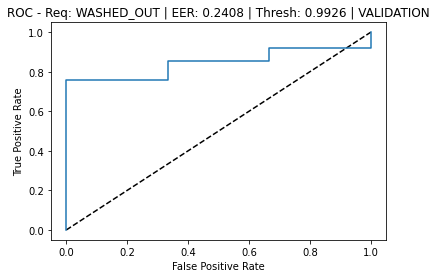

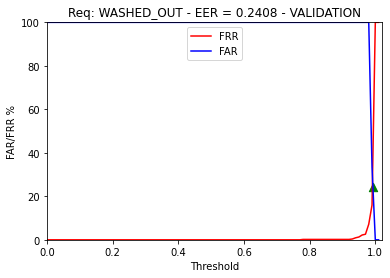

Requisite: WASHED_OUT - EER_interp: 24.08% - Best Threshold: 0.992622426327537
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.02      1.00      0.04         3
    COMPLIANT       1.00      0.76      0.86       544

     accuracy                           0.76       547
    macro avg       0.51      0.88      0.45       547
 weighted avg       0.99      0.76      0.86       547

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 24.08% | EER_mean: 12.04% | TP: 413 | TN: 3 | FP: 0 | FN: 131
Accuracy ------------------------------------------------
Model Accuracy: 76.05%
---------------------------------------------------------
Requisite: PIXELATION


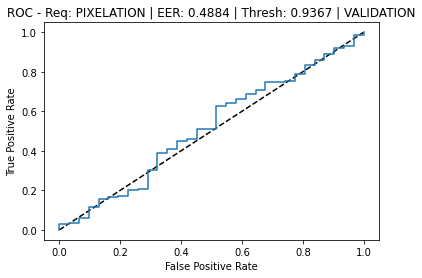

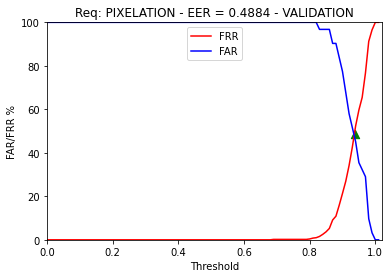

Requisite: PIXELATION - EER_interp: 48.84% - Best Threshold: 0.936663994955462
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.06      0.52      0.11        31
    COMPLIANT       0.95      0.51      0.66       516

     accuracy                           0.51       547
    macro avg       0.50      0.51      0.39       547
 weighted avg       0.90      0.51      0.63       547

Confusion matrix ----------------------------------------
FAR: 48.39% | FRR: 48.84% | EER_mean: 48.620000000000005% | TP: 264 | TN: 16 | FP: 15 | FN: 252
Accuracy ------------------------------------------------
Model Accuracy: 51.190000000000005%
---------------------------------------------------------
Requisite: HAIR_EYES


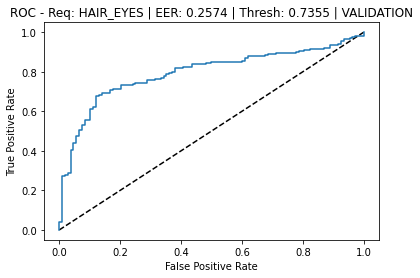

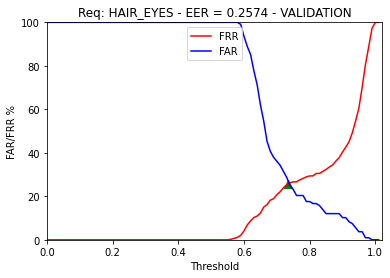

Requisite: HAIR_EYES - EER_interp: 25.740000000000002% - Best Threshold: 0.7354972169040819
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.41      0.74      0.53       108
    COMPLIANT       0.92      0.74      0.82       439

     accuracy                           0.74       547
    macro avg       0.67      0.74      0.68       547
 weighted avg       0.82      0.74      0.76       547

Confusion matrix ----------------------------------------
FAR: 25.929999999999996% | FRR: 25.740000000000002% | EER_mean: 25.83% | TP: 326 | TN: 80 | FP: 28 | FN: 113
Accuracy ------------------------------------------------
Model Accuracy: 74.22%
---------------------------------------------------------
Requisite: BACKGROUND


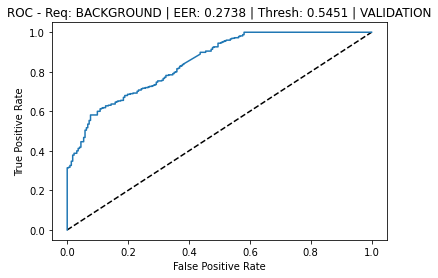

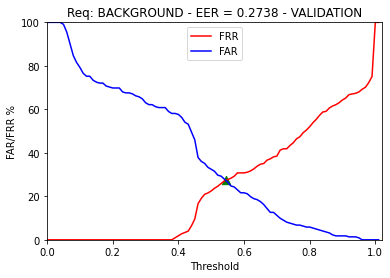

Requisite: BACKGROUND - EER_interp: 27.38% - Best Threshold: 0.5450639950312102
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.65      0.73      0.68       222
    COMPLIANT       0.80      0.73      0.76       325

     accuracy                           0.73       547
    macro avg       0.72      0.73      0.72       547
 weighted avg       0.74      0.73      0.73       547

Confusion matrix ----------------------------------------
FAR: 27.029999999999998% | FRR: 27.38% | EER_mean: 27.200000000000003% | TP: 236 | TN: 162 | FP: 60 | FN: 89
Accuracy ------------------------------------------------
Model Accuracy: 72.76%
---------------------------------------------------------
Requisite: RED_EYES


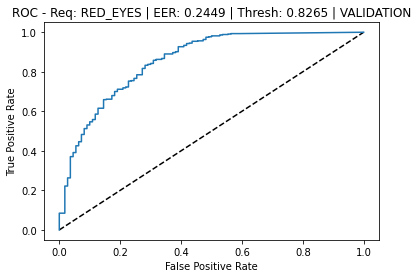

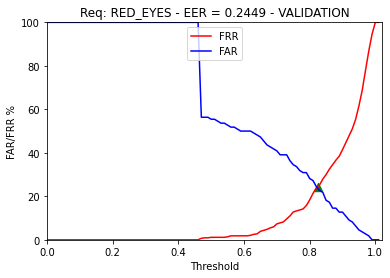

Requisite: RED_EYES - EER_interp: 24.490000000000002% - Best Threshold: 0.8264747916697365
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.76      0.56       110
    COMPLIANT       0.93      0.76      0.83       437

     accuracy                           0.76       547
    macro avg       0.68      0.76      0.70       547
 weighted avg       0.83      0.76      0.78       547

Confusion matrix ----------------------------------------
FAR: 23.64% | FRR: 24.490000000000002% | EER_mean: 24.060000000000002% | TP: 330 | TN: 84 | FP: 26 | FN: 107
Accuracy ------------------------------------------------
Model Accuracy: 75.69%
---------------------------------------------------------


In [16]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model()

## Test Split

Testing Trained Model
Predicting labels....
5/5 [==============================] - 25s 6s/step
Prediction finished!
Requisite: MOUTH


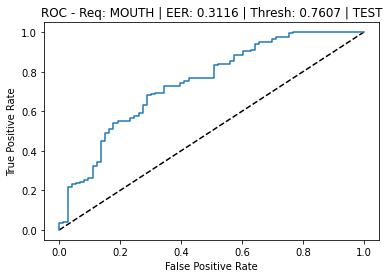

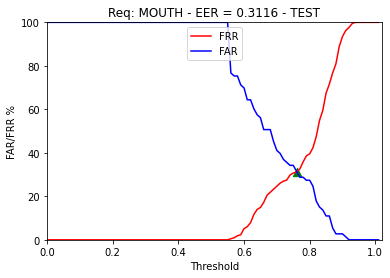

Requisite: MOUTH - EER_interp: 31.16% - Best Threshold: 0.7606674845828573
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.43      0.70      0.53        73
    COMPLIANT       0.87      0.69      0.77       215

     accuracy                           0.69       288
    macro avg       0.65      0.69      0.65       288
 weighted avg       0.76      0.69      0.71       288

Confusion matrix ----------------------------------------
FAR: 30.14% | FRR: 31.16% | EER_mean: 30.65% | TP: 148 | TN: 51 | FP: 22 | FN: 67
Accuracy ------------------------------------------------
Model Accuracy: 69.1%
---------------------------------------------------------
Requisite: ROTATION


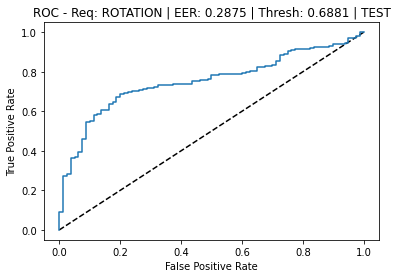

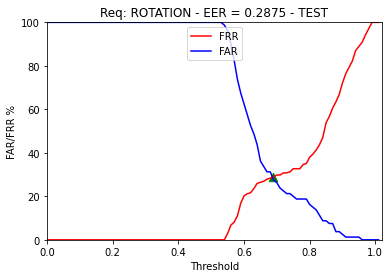

Requisite: ROTATION - EER_interp: 28.749999999999996% - Best Threshold: 0.6881417632106792
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.49      0.71      0.58        80
    COMPLIANT       0.87      0.71      0.78       208

     accuracy                           0.71       288
    macro avg       0.68      0.71      0.68       288
 weighted avg       0.76      0.71      0.72       288

Confusion matrix ----------------------------------------
FAR: 28.749999999999996% | FRR: 28.849999999999998% | EER_mean: 28.799999999999997% | TP: 148 | TN: 57 | FP: 23 | FN: 60
Accuracy ------------------------------------------------
Model Accuracy: 71.17999999999999%
---------------------------------------------------------
Requisite: L_AWAY


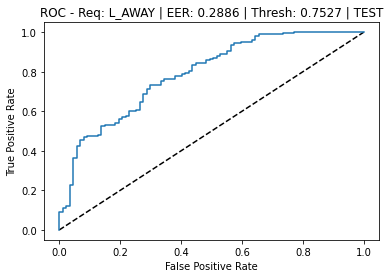

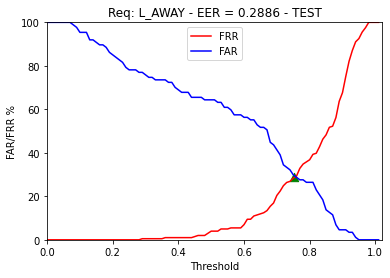

Requisite: L_AWAY - EER_interp: 28.860000000000003% - Best Threshold: 0.7527017175261634
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.52      0.71      0.60        87
    COMPLIANT       0.85      0.71      0.78       201

     accuracy                           0.71       288
    macro avg       0.68      0.71      0.69       288
 weighted avg       0.75      0.71      0.72       288

Confusion matrix ----------------------------------------
FAR: 28.74% | FRR: 28.860000000000003% | EER_mean: 28.799999999999997% | TP: 143 | TN: 62 | FP: 25 | FN: 58
Accuracy ------------------------------------------------
Model Accuracy: 71.17999999999999%
---------------------------------------------------------
Requisite: EYES_CLOSED


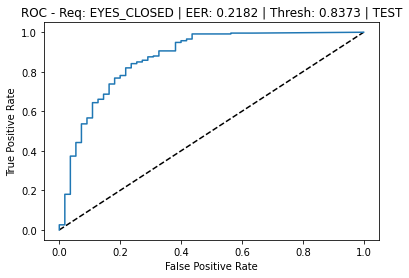

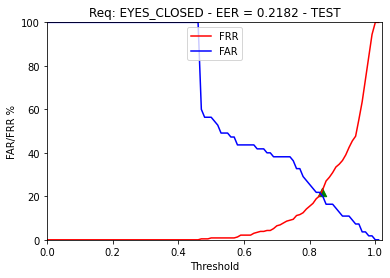

Requisite: EYES_CLOSED - EER_interp: 21.82% - Best Threshold: 0.8373490571975806
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      0.78      0.58        55
    COMPLIANT       0.94      0.78      0.85       233

     accuracy                           0.78       288
    macro avg       0.70      0.78      0.71       288
 weighted avg       0.85      0.78      0.80       288

Confusion matrix ----------------------------------------
FAR: 21.82% | FRR: 21.89% | EER_mean: 21.86% | TP: 182 | TN: 43 | FP: 12 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 78.12%
---------------------------------------------------------
Requisite: CLOSE


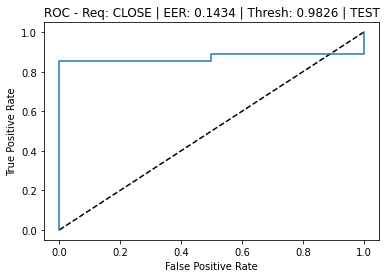

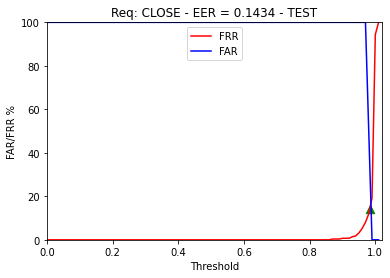

Requisite: CLOSE - EER_interp: 14.34% - Best Threshold: 0.9825641558720515
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.05      1.00      0.09         2
    COMPLIANT       1.00      0.86      0.92       286

     accuracy                           0.86       288
    macro avg       0.52      0.93      0.51       288
 weighted avg       0.99      0.86      0.92       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 14.34% | EER_mean: 7.17% | TP: 245 | TN: 2 | FP: 0 | FN: 41
Accuracy ------------------------------------------------
Model Accuracy: 85.76%
---------------------------------------------------------
Requisite: HAT


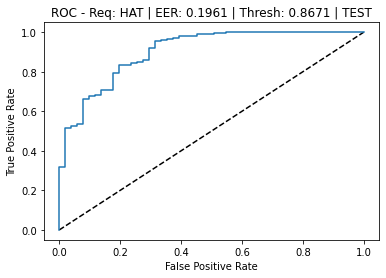

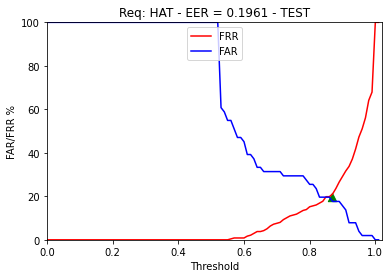

Requisite: HAT - EER_interp: 19.61% - Best Threshold: 0.8670793175698182
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.46      0.80      0.58        51
    COMPLIANT       0.95      0.79      0.86       237

     accuracy                           0.80       288
    macro avg       0.70      0.80      0.72       288
 weighted avg       0.86      0.80      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.61% | FRR: 20.68% | EER_mean: 20.150000000000002% | TP: 188 | TN: 41 | FP: 10 | FN: 49
Accuracy ------------------------------------------------
Model Accuracy: 79.51%
---------------------------------------------------------
Requisite: DARK_GLASSES


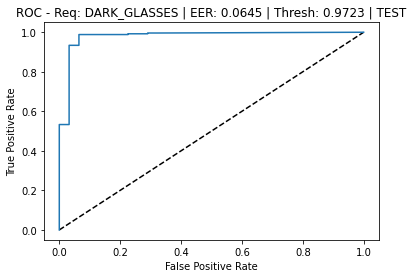

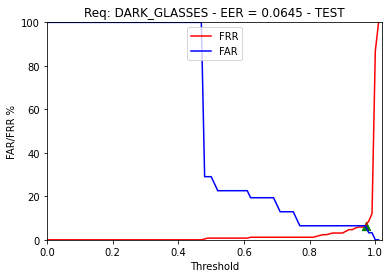

Requisite: DARK_GLASSES - EER_interp: 6.45% - Best Threshold: 0.9723234772682217
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.63      0.94      0.75        31
    COMPLIANT       0.99      0.93      0.96       257

     accuracy                           0.93       288
    macro avg       0.81      0.93      0.86       288
 weighted avg       0.95      0.93      0.94       288

Confusion matrix ----------------------------------------
FAR: 6.45% | FRR: 6.61% | EER_mean: 6.529999999999999% | TP: 240 | TN: 29 | FP: 2 | FN: 17
Accuracy ------------------------------------------------
Model Accuracy: 93.4%
---------------------------------------------------------
Requisite: FRAMES_HEAVY


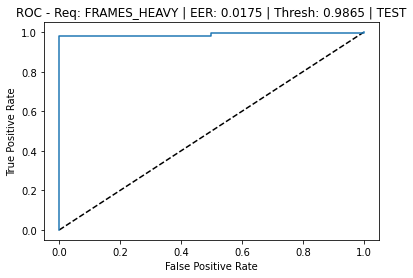

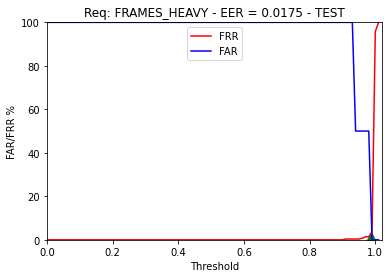

Requisite: FRAMES_HEAVY - EER_interp: 1.7500000000000002% - Best Threshold: 0.9865389512135443
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.29      1.00      0.44         2
    COMPLIANT       1.00      0.98      0.99       286

     accuracy                           0.98       288
    macro avg       0.64      0.99      0.72       288
 weighted avg       1.00      0.98      0.99       288

Confusion matrix ----------------------------------------
FAR: 0.0% | FRR: 1.7500000000000002% | EER_mean: 0.88% | TP: 281 | TN: 2 | FP: 0 | FN: 5
Accuracy ------------------------------------------------
Model Accuracy: 98.26%
---------------------------------------------------------
Requisite: FRAME_EYES


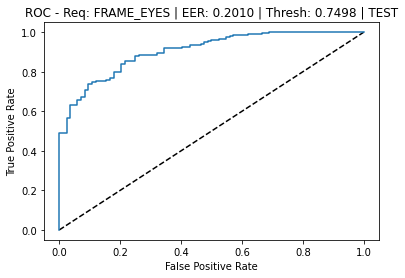

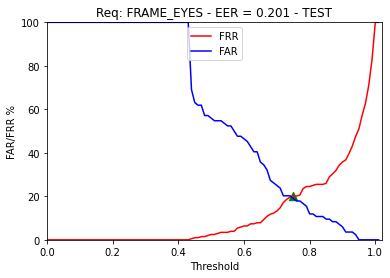

Requisite: FRAME_EYES - EER_interp: 20.1% - Best Threshold: 0.7498447369126726
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.62      0.81      0.70        84
    COMPLIANT       0.91      0.80      0.85       204

     accuracy                           0.80       288
    macro avg       0.77      0.80      0.78       288
 weighted avg       0.83      0.80      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.05% | FRR: 20.1% | EER_mean: 19.580000000000002% | TP: 163 | TN: 68 | FP: 16 | FN: 41
Accuracy ------------------------------------------------
Model Accuracy: 80.21000000000001%
---------------------------------------------------------
Requisite: FLASH_LENSES


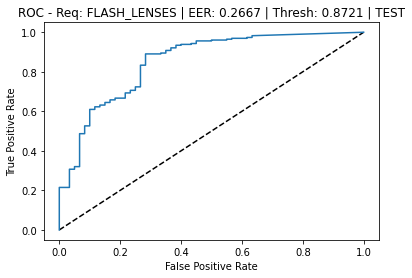

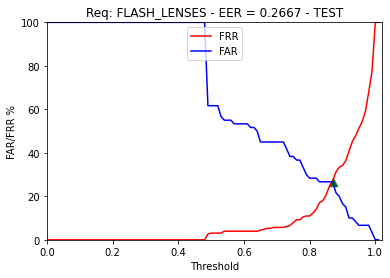

Requisite: FLASH_LENSES - EER_interp: 26.669999999999998% - Best Threshold: 0.8720743656158448
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.41      0.73      0.53        60
    COMPLIANT       0.91      0.72      0.81       228

     accuracy                           0.73       288
    macro avg       0.66      0.73      0.67       288
 weighted avg       0.81      0.73      0.75       288

Confusion matrix ----------------------------------------
FAR: 26.669999999999998% | FRR: 27.63% | EER_mean: 27.150000000000002% | TP: 165 | TN: 44 | FP: 16 | FN: 63
Accuracy ------------------------------------------------
Model Accuracy: 72.57000000000001%
---------------------------------------------------------
Requisite: VEIL


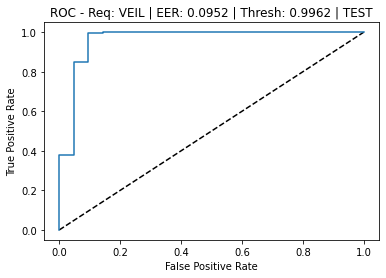

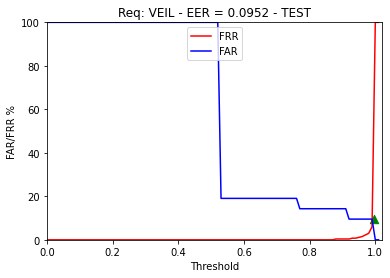

Requisite: VEIL - EER_interp: 9.520000000000001% - Best Threshold: 0.9962375164031984
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.32      0.90      0.48        21
    COMPLIANT       0.99      0.85      0.92       267

     accuracy                           0.85       288
    macro avg       0.66      0.88      0.70       288
 weighted avg       0.94      0.85      0.88       288

Confusion matrix ----------------------------------------
FAR: 9.520000000000001% | FRR: 14.979999999999999% | EER_mean: 12.25% | TP: 227 | TN: 19 | FP: 2 | FN: 40
Accuracy ------------------------------------------------
Model Accuracy: 85.42%
---------------------------------------------------------
Requisite: REFLECTION


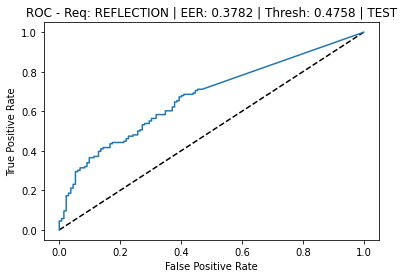

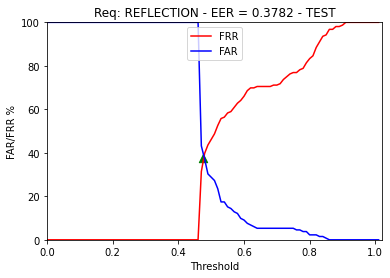

Requisite: REFLECTION - EER_interp: 37.82% - Best Threshold: 0.47578610365195806
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.58      0.63      0.61       132
    COMPLIANT       0.66      0.62      0.64       156

     accuracy                           0.62       288
    macro avg       0.62      0.63      0.62       288
 weighted avg       0.63      0.62      0.63       288

Confusion matrix ----------------------------------------
FAR: 37.12% | FRR: 37.82% | EER_mean: 37.47% | TP: 97 | TN: 83 | FP: 49 | FN: 59
Accuracy ------------------------------------------------
Model Accuracy: 62.5%
---------------------------------------------------------
Requisite: LIGHT


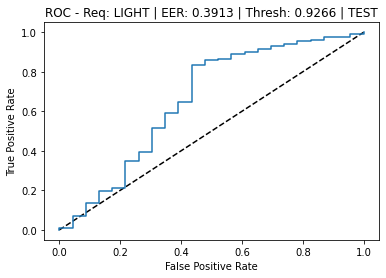

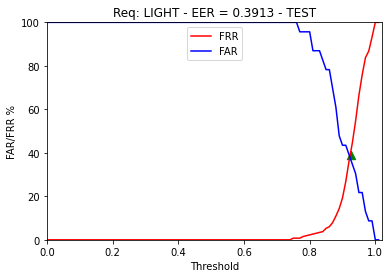

Requisite: LIGHT - EER_interp: 39.129999999999995% - Best Threshold: 0.9265801310539247
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.11      0.61      0.19        23
    COMPLIANT       0.95      0.59      0.73       265

     accuracy                           0.59       288
    macro avg       0.53      0.60      0.46       288
 weighted avg       0.88      0.59      0.69       288

Confusion matrix ----------------------------------------
FAR: 39.129999999999995% | FRR: 40.75% | EER_mean: 39.94% | TP: 157 | TN: 14 | FP: 9 | FN: 108
Accuracy ------------------------------------------------
Model Accuracy: 59.38%
---------------------------------------------------------
Requisite: SH_FACE


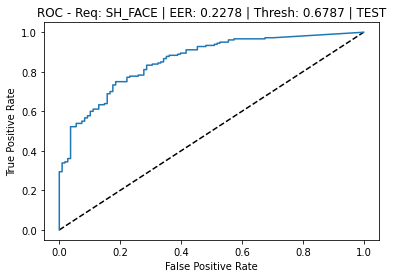

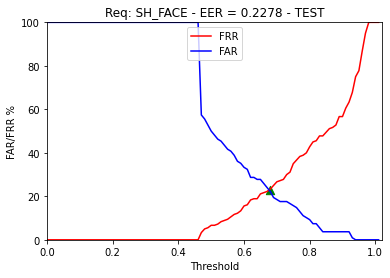

Requisite: SH_FACE - EER_interp: 22.78% - Best Threshold: 0.6787475824356075
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.67      0.78      0.72       108
    COMPLIANT       0.85      0.77      0.81       180

     accuracy                           0.77       288
    macro avg       0.76      0.78      0.77       288
 weighted avg       0.78      0.77      0.78       288

Confusion matrix ----------------------------------------
FAR: 22.220000000000002% | FRR: 22.78% | EER_mean: 22.5% | TP: 139 | TN: 84 | FP: 24 | FN: 41
Accuracy ------------------------------------------------
Model Accuracy: 77.42999999999999%
---------------------------------------------------------
Requisite: SH_HEAD


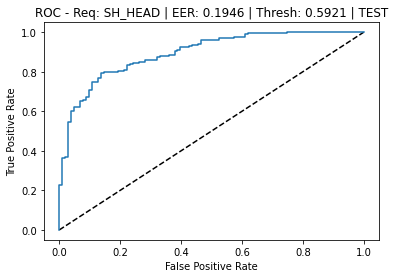

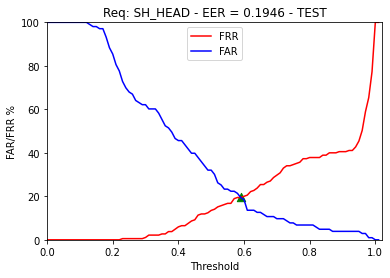

Requisite: SH_HEAD - EER_interp: 19.46% - Best Threshold: 0.5920752667091987
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.70      0.81      0.75       103
    COMPLIANT       0.88      0.81      0.84       185

     accuracy                           0.81       288
    macro avg       0.79      0.81      0.79       288
 weighted avg       0.82      0.81      0.81       288

Confusion matrix ----------------------------------------
FAR: 19.42% | FRR: 19.46% | EER_mean: 19.439999999999998% | TP: 149 | TN: 83 | FP: 20 | FN: 36
Accuracy ------------------------------------------------
Model Accuracy: 80.56%
---------------------------------------------------------
Requisite: BLURRED


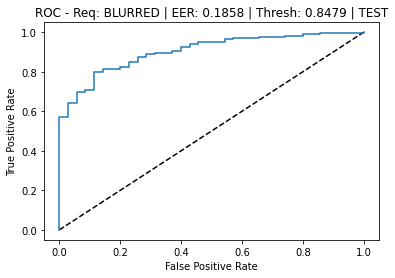

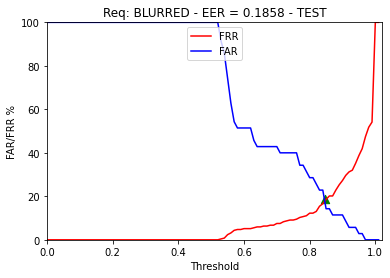

Requisite: BLURRED - EER_interp: 18.58% - Best Threshold: 0.8478733275247612
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.38      0.83      0.52        35
    COMPLIANT       0.97      0.81      0.89       253

     accuracy                           0.82       288
    macro avg       0.68      0.82      0.70       288
 weighted avg       0.90      0.82      0.84       288

Confusion matrix ----------------------------------------
FAR: 17.14% | FRR: 18.58% | EER_mean: 17.86% | TP: 206 | TN: 29 | FP: 6 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 81.6%
---------------------------------------------------------
Requisite: SKIN_TONE


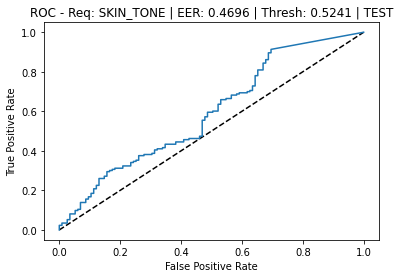

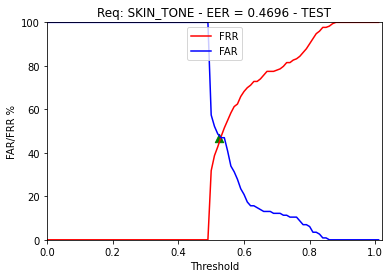

Requisite: SKIN_TONE - EER_interp: 46.96% - Best Threshold: 0.5241069793700994
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.53      0.48       115
    COMPLIANT       0.64      0.55      0.59       173

     accuracy                           0.55       288
    macro avg       0.54      0.54      0.54       288
 weighted avg       0.56      0.55      0.55       288

Confusion matrix ----------------------------------------
FAR: 46.96% | FRR: 44.51% | EER_mean: 45.739999999999995% | TP: 96 | TN: 61 | FP: 54 | FN: 77
Accuracy ------------------------------------------------
Model Accuracy: 54.510000000000005%
---------------------------------------------------------
Requisite: WASHED_OUT


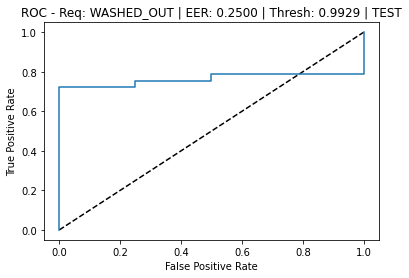

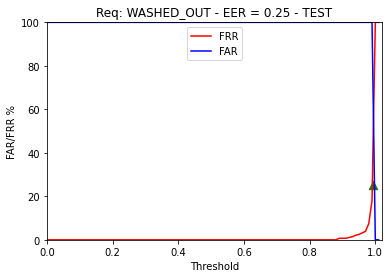

Requisite: WASHED_OUT - EER_interp: 25.0% - Best Threshold: 0.9929175376892089
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.04      0.75      0.08         4
    COMPLIANT       1.00      0.75      0.86       284

     accuracy                           0.75       288
    macro avg       0.52      0.75      0.47       288
 weighted avg       0.98      0.75      0.85       288

Confusion matrix ----------------------------------------
FAR: 25.0% | FRR: 24.65% | EER_mean: 24.82% | TP: 214 | TN: 3 | FP: 1 | FN: 70
Accuracy ------------------------------------------------
Model Accuracy: 75.35%
---------------------------------------------------------
Requisite: PIXELATION


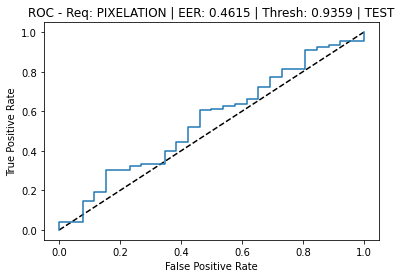

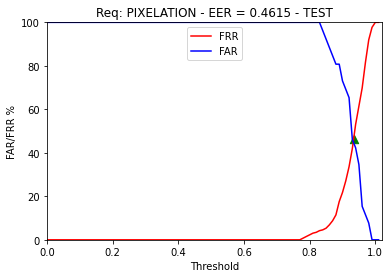

Requisite: PIXELATION - EER_interp: 46.150000000000006% - Best Threshold: 0.9358845949173221
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.10      0.54      0.17        26
    COMPLIANT       0.92      0.52      0.66       262

     accuracy                           0.52       288
    macro avg       0.51      0.53      0.42       288
 weighted avg       0.84      0.52      0.62       288

Confusion matrix ----------------------------------------
FAR: 46.150000000000006% | FRR: 48.089999999999996% | EER_mean: 47.12% | TP: 136 | TN: 14 | FP: 12 | FN: 126
Accuracy ------------------------------------------------
Model Accuracy: 52.080000000000005%
---------------------------------------------------------
Requisite: HAIR_EYES


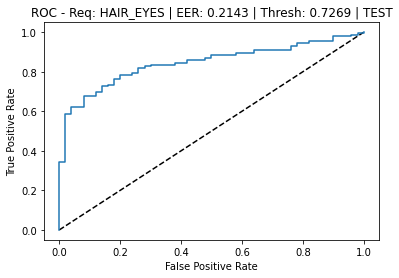

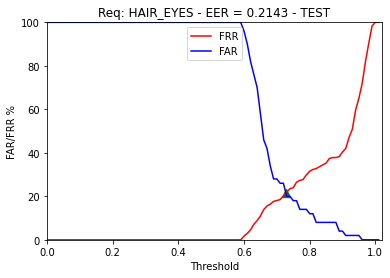

Requisite: HAIR_EYES - EER_interp: 21.43% - Best Threshold: 0.7269390736307417
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.44      0.80      0.57        50
    COMPLIANT       0.95      0.79      0.86       238

     accuracy                           0.79       288
    macro avg       0.69      0.79      0.71       288
 weighted avg       0.86      0.79      0.81       288

Confusion matrix ----------------------------------------
FAR: 20.0% | FRR: 21.43% | EER_mean: 20.72% | TP: 187 | TN: 40 | FP: 10 | FN: 51
Accuracy ------------------------------------------------
Model Accuracy: 78.82000000000001%
---------------------------------------------------------
Requisite: BACKGROUND


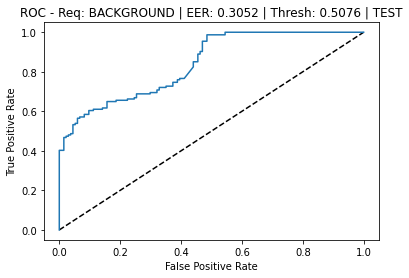

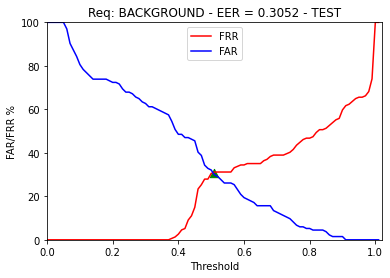

Requisite: BACKGROUND - EER_interp: 30.520000000000003% - Best Threshold: 0.5076320419062965
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.66      0.69      0.68       134
    COMPLIANT       0.72      0.69      0.71       154

     accuracy                           0.69       288
    macro avg       0.69      0.69      0.69       288
 weighted avg       0.70      0.69      0.69       288

Confusion matrix ----------------------------------------
FAR: 30.599999999999998% | FRR: 30.520000000000003% | EER_mean: 30.56% | TP: 107 | TN: 93 | FP: 41 | FN: 47
Accuracy ------------------------------------------------
Model Accuracy: 69.44%
---------------------------------------------------------
Requisite: RED_EYES


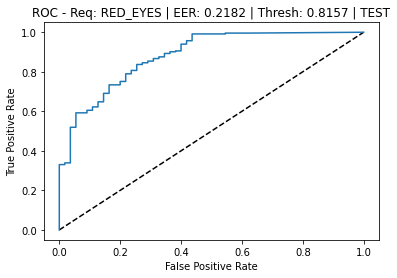

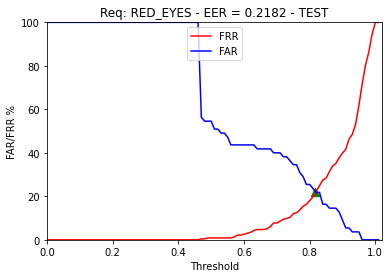

Requisite: RED_EYES - EER_interp: 21.82% - Best Threshold: 0.8156734108923507
Classification report -----------------------------------
               precision    recall  f1-score   support

NON_COMPLIANT       0.47      0.78      0.59        55
    COMPLIANT       0.94      0.79      0.86       233

     accuracy                           0.79       288
    macro avg       0.70      0.79      0.72       288
 weighted avg       0.85      0.79      0.81       288

Confusion matrix ----------------------------------------
FAR: 21.82% | FRR: 21.029999999999998% | EER_mean: 21.42% | TP: 184 | TN: 43 | FP: 12 | FN: 49
Accuracy ------------------------------------------------
Model Accuracy: 78.82000000000001%
---------------------------------------------------------


In [17]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model()

# Vizualize Model Classification

# Finishing Experiment Manager

In [18]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
